In [38]:
# generic libraries
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize, curve_fit

# project specific custom libraries
from config import *
from simulation import simulate_decay_times
from analysis import *

In [39]:
#set a seed for numpys random number generator
np.random.seed(42)

In [40]:
# Exercise part 3 Simple simulation

# Part 0, generate the plot from the N function
t_bounds = [0, 20000e-9]
n = 10000

t_space = np.linspace(t_bounds[0], t_bounds[1], n)
t_computed_values = N(t_space, n)

# Part 1, simulate n decay times and create a histogram plot
simulated_decay_points = simulate_decay_times(n, t_bounds[1])


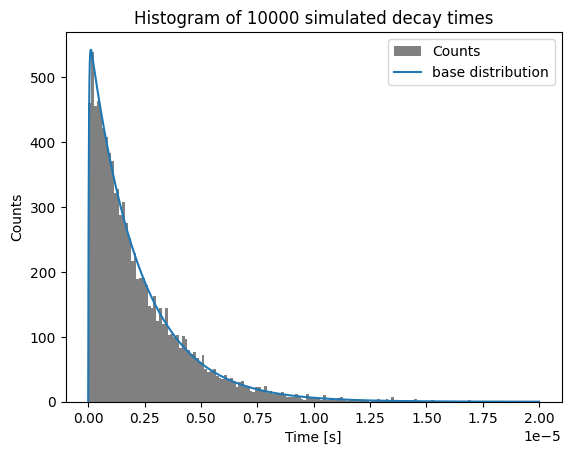

In [53]:
# create the histogram
counts, bins = np.histogram(simulated_decay_points[:, 0] , bins=150, density=False)
bin_width = bins[1]-bins[0]
plt.hist(bins[:-1], bins, weights=counts, color='gray', label='Counts')
plt.plot(t_space, t_computed_values*bin_width, label='base distribution')
plt.xlabel('Time [s]')
plt.ylabel('Counts')
plt.title(f'Histogram of {n} simulated decay times')
plt.legend()
plt.savefig('../Documentation/images/simulated_decay_histogram_150bins.pdf')
plt.show()
plt.close()

In [42]:
# muon_estimate, pion_estimate, muon_uncertainty, pion_uncertainty = binned_maximum_likelihood_fit(counts, bins)
# print("Muon estimate: ", muon_estimate)
# print("Muon uncertainty: ", muon_uncertainty)
# print("Pion estimate: ", pion_estimate) 
# print("Pion uncertainty: ", pion_uncertainty)

In [43]:
bin_centers = 0.5 * (bins[:-1] + bins[1:])

MUON_estimate = 2e-6
PION_estimate = 2e-8

# PION_estimate = 2.6033e-8
# MUON_estimate = 2.1969811e-6

estimate_lifetime_count = estimate_lifetime_counts(bin_centers, bin_width, n, MUON_estimate, PION_estimate)

negative_log_likelihood(counts, estimate_lifetime_count)

np.float64(-53254.84017687164)

In [44]:
# def N_wrapper(bin_centers, muon_mean_lifetime, pion_mean_lifetime):
#     counts = estimate_lifetime_counts(bin_centers, bin_width, n, muon_mean_lifetime, pion_mean_lifetime)
#     return counts

In [45]:
# popt, pcov = curve_fit(N_wrapper, bin_centers, counts, p0=[MUON_estimate, PION_estimate])
# MUON_estimate_squares, PION_estimate_squares = popt
# MUON_uncer_squares, PION_uncer_squares = np.sqrt(np.diag(pcov))

MUON_estimate_squares, PION_estimate_squares, MUON_uncer_squares, PION_uncer_squares = binned_least_squares_fit(counts, bins, initial_guess = [MUON_estimate, PION_estimate])

print(MUON_estimate_squares)
print(PION_estimate_squares)
print(MUON_uncer_squares)
print(PION_uncer_squares)

2.238233885294098e-06
3.5602386625483996e-08
1.5056878473207375e-08
1.741719510624595e-09


In [46]:
estimate_lifetime_count_squares = estimate_lifetime_counts(bin_centers, bin_width, n, MUON_estimate_squares, PION_estimate_squares)
negative_log_likelihood(counts, estimate_lifetime_count_squares)

np.float64(-53319.59465502101)

In [47]:
negative_log_likelihood(counts, estimate_lifetime_count)

np.float64(-53254.84017687164)

In [48]:
MUON_estimate_like, PION_estimate_like = minimize(binned_maximum_likelihood, [2e-8, 2e-6], args=(counts, bin_centers, bin_width, n)).x
print(MUON_estimate_like)
print(PION_estimate_like)

2.5083776929074553e-08
2.2142500641954544e-06


In [49]:
MUON_estimate_full, PION_estimate_full, MUON_uncer_full, PION_uncer_full = binned_maximum_likelihood_fit(counts, bins)
print(MUON_estimate_full)
print(PION_estimate_full)

/Users/tillboehringer/Dropbox/Studium/Physik/Semester4/PHY241_Project/PHY241/Code/analysis.py:151: RuntimeWarning: invalid value encountered in log
  nll = - np.sum(counts * np.log(estimated_counts))


2.221533121916133e-06
2.9016188298640683e-08


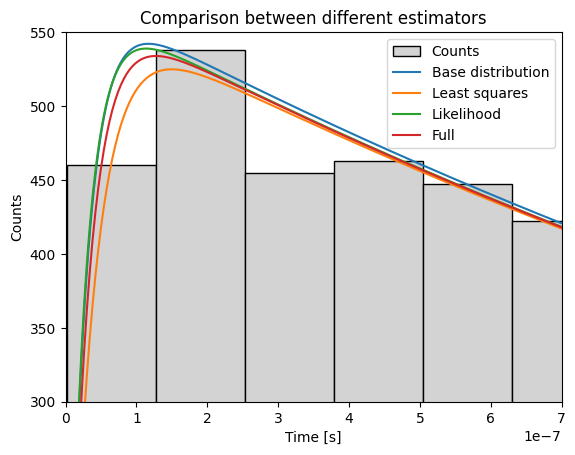

In [54]:
estimate_lifetime_count_squares = estimate_lifetime_counts(t_space, bin_width, n, MUON_estimate_squares, PION_estimate_squares)
estimate_lifetime_count_like = estimate_lifetime_counts(t_space, bin_width, n, MUON_estimate_like, PION_estimate_like)
estimate_lifetime_count_full = estimate_lifetime_counts(t_space, bin_width, n, MUON_estimate_full, PION_estimate_full)

plt.hist(bins[:-1], bins, weights=counts, color='lightgray', edgecolor='black', label='Counts')
plt.plot(t_space, t_computed_values*bin_width, label='Base distribution')
plt.plot(t_space, estimate_lifetime_count_squares, label='Least squares')
plt.plot(t_space, estimate_lifetime_count_like, label='Likelihood')
plt.plot(t_space, estimate_lifetime_count_full, label='Full')
plt.xlabel('Time [s]')
plt.ylabel('Counts')
plt.title(f'Comparison between different estimators')
plt.legend()
plt.xlim(0,0.7e-6)
plt.ylim(300, 550)
plt.savefig('../Documentation/images/comparison_estimators_150bins.pdf')
plt.show()
plt.close()